In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
heroinUsers = pd.read_excel('./tables/drugOffenses/heroinUsers.xlsx')
heroinSuppliers = pd.read_excel('./tables/drugOffenses/heroinSuppliers.xlsx')

heroinUsers = heroinUsers.drop(columns='Unnamed: 15').drop(columns=2004)
heroinSuppliers = heroinSuppliers.drop(columns='Unnamed: 15').drop(columns=2004)

heroinUsers.drop(heroinUsers.tail(2).index,inplace=True)
heroinSuppliers.drop(heroinSuppliers.tail(2).index,inplace=True)

In [116]:
heroinUsers = heroinUsers.fillna(0)
years = [2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005]
heroinUsersCountries = pd.DataFrame()
for country in heroinUsers['Country']:
    heroinUsersCountries = heroinUsersCountries.append({'Users': float(heroinUsers[heroinUsers['Country'] == country][years].sum(axis=1)), 'Country': country},ignore_index=True)    
        
heroinSuppliers = heroinSuppliers.fillna(0)
heroinSuppliersCountries = pd.DataFrame()
for country in heroinSuppliers['Country']:
    heroinSuppliersCountries = heroinSuppliersCountries.append({'Suppliers': float(heroinSuppliers[heroinSuppliers['Country'] == country][years].sum(axis=1)), 'Country': country},ignore_index=True)    

In [135]:
heroinData = heroinSuppliersCountries.merge(heroinUsersCountries)
heroinData['Ratio'] = heroinData['Users']/heroinData['Suppliers']

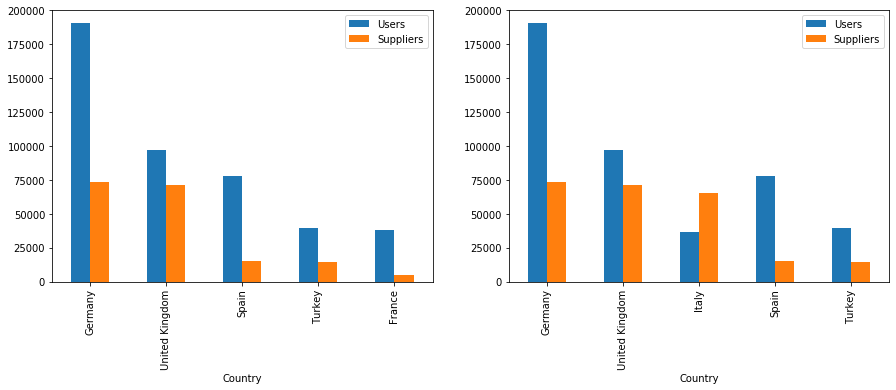

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
heroinData[['Country', 'Users', 'Suppliers']].sort_values(by='Users', ascending=False).head(5).plot(x = 'Country', kind='bar', ax = axes[0])
heroinData[['Country', 'Users', 'Suppliers']].sort_values(by='Suppliers', ascending=False).head(5).plot(x = 'Country', kind='bar', ax = axes[1])

Top 5 countries sorted by Users and sorted by Suppliers

In [181]:
heroinData[['Country', 'Ratio']].dropna().sort_values(by = 'Ratio', ascending = False).head(5)

,Country,Ratio
9,France,8.039696
12,Hungary,5.802469
26,Spain,5.055054
4,Cyprus,4.870588
17,Luxembourg,3.414352


User : Supplier ratio.